# Simulated Microlensing for Sensitivity

If I start with the physical params, what single-len (SL) microlesing parameters do I get?

The SL microlensing parameterisation is:
$u_0$, $t_E$, $t_0$.

The higher-order effects are:
$\rho$, ${\vec {\pi }}_{E}={{\tilde {r}}_{E}}^{-1}$.

$$M={\frac {c^{2}}{4G}}\theta _{E}{\tilde {r}}_{E},$$
$$\pi _{L}=\pi _{rel}+\pi _{S},$$
$$\pi _{rel}=\pi _{E}\theta _{E},$$
$$\mu _{L}=\mu _{rel}+\mu _{S},$$
$$\mu _{rel}=\frac{\theta _{E}}{t_{E}}.$$

$$u(t)={\sqrt {u_{0}^{2}+\left({\frac {t-t_{0}}{t_{E}}}\right)^{2}}}.$$
$$A(u)={\frac {u^{2}+2}{u{\sqrt {u^{2}+4}}}}.$$


$$\kappa=\frac{4G}{c^2} \rm{au}$$
$$ M = \frac{\theta _{E}^2}{\kappa\pi_{rel}}$$
$$\theta _{E}= \sqrt{M\kappa\pi_{rel}}$$

What microlensing parameters give a magnofication of at least 2?

In [88]:
import numpy as np

def A(u):
    '''Calculate magnification from u.'''
    return (u**2+2.)/(u*np.sqrt(u**2+4.))

def u(t,u0,t0,tE):
    '''Calculates u f for a given time using the microlensing parameters'''
    return np.sqrt(u0**2+((t-t0)/tE)**2)

def Amax(u0,t0,tE):
    '''Calculates Amax for a given set of microlensing parameters'''
    upeak = u(t0,u0,t0,tE)
    Apeak = A(upeak)
    return Apeak

In [3]:
n=100
u01, u0n, tE1, tEn = np.log10(0.01), np.log10(1), np.log10((1./24)/2.), np.log10(300)
print(u01, u0n, tE1, tEn)

-2.0 0.0 -1.6812412373755872 2.4771212547196626


In [4]:
u0s = 10**np.linspace(u01, u0n, n)  # $\theta_E/1000 < u0 < \theta_E$
tEs = 10.**np.linspace(tE1, tEn, n)  # $30\,\rm{min} < t_E < 300\,\rm{days}$ 
                                         # 40 min to 300 days is the extent of microlening events.

parameter_sets = np.vstack(np.meshgrid(u0s,tEs)).reshape(2,-1).T
N_samples, dims = parameter_sets.shape
visibility = np.zeros((N_samples,dims+1))
visibility[:,:dims] = parameter_sets
visibility[:,dims] = Amax(visibility[:,0],0.,visibility[:,1])
print(visibility[:5])


[[1.00000000e-02 2.08333333e-02 1.00003750e+02]
 [1.04761575e-02 2.08333333e-02 9.54587742e+01]
 [1.09749877e-02 2.08333333e-02 9.11203912e+01]
 [1.14975700e-02 2.08333333e-02 8.69792118e+01]
 [1.20450354e-02 2.08333333e-02 8.30262736e+01]]


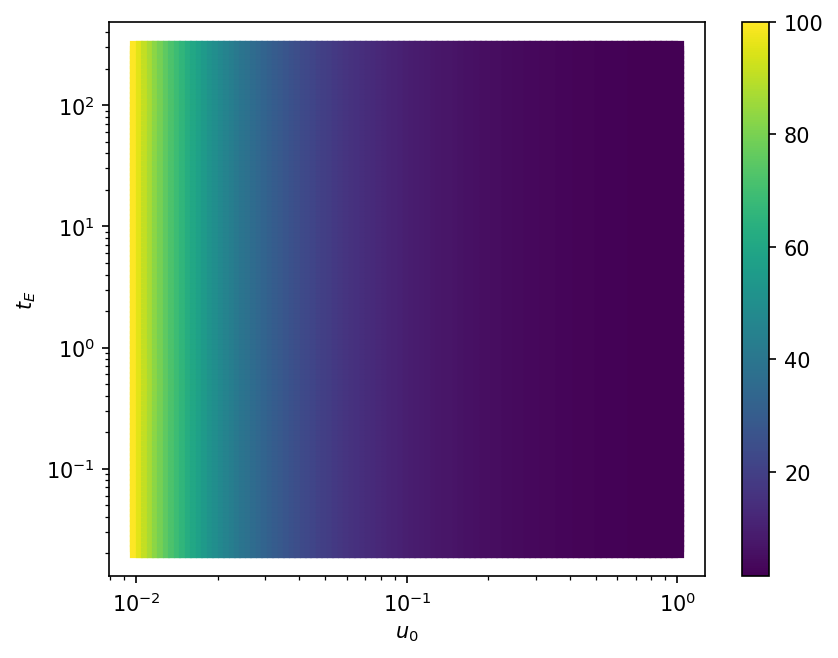

In [5]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)
plt.scatter(visibility[:,0], visibility[:,1],c=visibility[:,2],marker='s', linewidths=0.1)
plt.colorbar()
plt.xlabel(r'$u_0$')
plt.ylabel(r'$t_E$')
plt.xscale('log')
plt.yscale('log')
plt.show()

Vaying $t_E$ doesn't change Amax, Dingdog. But $\mu _{rel}=\theta _{E}/t_{E}.$ I think maybe $u_0$ can be a dummy parameter too.

In [6]:
theta1, thetan = np.log10(0.1), np.log10(1000)
print(theta1, thetan)

-1.0 3.0


In [7]:
def tE(theta_E,mu_rel):
    ''' '''
    return (theta_E/mu_rel)*365.25

mus = 10**np.linspace(0.1, 15, n)  # mas/yr
thetas = 10**np.linspace(theta1, thetan, n)

parameter_sets = np.vstack(np.meshgrid(mus, thetas)).reshape(2,-1).T

# mesh tEs
tEs= tE(parameter_sets[:,1], parameter_sets[:,0])
print(tEs)

# Amaxs
N_samples, dims = parameter_sets.shape
visibility = np.zeros((N_samples, dims+3))
visibility[:,:dims] = parameter_sets
visibility[:,dims] = tEs
visibility[:,dims+1] = 1./parameter_sets[:,1]  # equal u0 in units of mas not theta_E
visibility[:,dims+2] = Amax(1./parameter_sets[:,1],0.,tEs)  
print(visibility[:5])
print(visibility[-5:])

[2.90128388e+01 2.05156449e+01 1.45070839e+01 ... 7.30466537e-10
 5.16529673e-10 3.65250000e-10]
[[ 1.25892541  0.1        29.01283877 10.          1.00019229]
 [ 1.78034861  0.1        20.51564493 10.          1.00019229]
 [ 2.51773549  0.1        14.50708393 10.          1.00019229]
 [ 3.56053412  0.1        10.25829238 10.          1.00019229]
 [ 5.03524031  0.1         7.25387425 10.          1.00019229]]
[[2.50022906e+14 1.00000000e+03 1.46086615e-09 1.00000000e-03
  1.00000037e+03]
 [3.53577685e+14 1.00000000e+03 1.03301202e-09 1.00000000e-03
  1.00000037e+03]
 [5.00022905e+14 1.00000000e+03 7.30466537e-10 1.00000000e-03
  1.00000037e+03]
 [7.07122977e+14 1.00000000e+03 5.16529673e-10 1.00000000e-03
  1.00000037e+03]
 [1.00000000e+15 1.00000000e+03 3.65250000e-10 1.00000000e-03
  1.00000037e+03]]


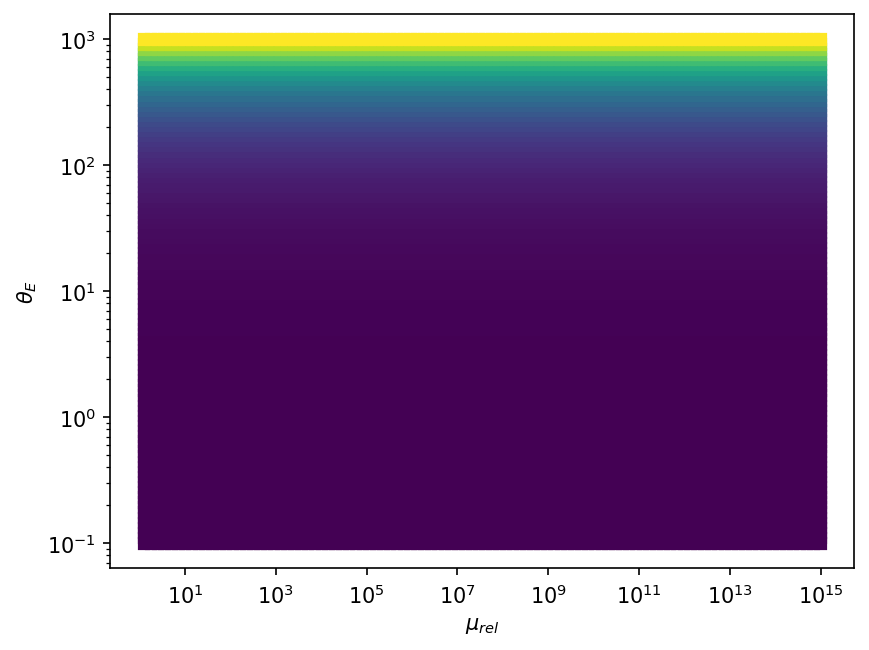

In [8]:
plt.figure(dpi=150)
plt.scatter(visibility[:,0], visibility[:,1],c=visibility[:,-1],marker='s', linewidths=0.1)
#plt.colorbar(legend=r'$A_{max}$')
plt.xlabel(r'$\mu_{rel}$')
plt.ylabel(r'$\theta_E$')
plt.xscale('log')
plt.yscale('log')
plt.show()

$\mu_{rel}$ is just the speed the event happens. It doesn't change $A_{max}$. so $\theta_E$ is effectively a proxy for detetion efficieny if we assume we are always observing. If we don't assume that, $t$, $t_0$, $t_E$, and $\mu_{rel}$ come back in to play (no need for all of them).

The next layer down is to consider mass and distance. Lets start with $1\,M_\odot.$

In [9]:

def thetaE(M,pirel_mas):
    ''' find theta_E
    
    Inputs:
    --------
    M:                  arr of float (like theta_E)
                        in Solar masses
    pirel_mas:          arr or flaot
                        mas (milliarcseconds)

    Output:
    --------
    theta_E:            arr or flaot
                        mas (milliarcseconds)
                
    Notes:
    -------
    math: \theta_E = \sqrt{M\kappa\pi_{rel}},
    where
    math: \kappa=8.144\,\rm{mas}/M_\odot.
    '''

    # Constants
    kappa = 8.144  # mas/MS
    
    return np.sqrt(M*kappa*pirel_mas)  # M in Jupiter masses


In [57]:
#Lets start with a pi_rel histogram from uniform d
D1, Dn  = 0.001**2, 8.5**2
print(D1, Dn)

1e-06 72.25


In [58]:
def pi_rel(DL,DS):
    ''' Find pi_rel

    Inputs:
    --------
    DL:                 arr or float
                        kpc
    DS:                 arr or float
                        default is 8 - galactic center
                        kpc    

    Output:
    --------
    pirel_mas:          arr or flaot
                        mas (milliarcseconds)

                
    Notes:
    -------
    $\pi_{rel} = \rm{au}(\frac{1}{D_L}-\frac{1}{D_S})$,
    the au just means we are working in parsecs distances and as for our angles because, be definition,
    1 parsec is the disance to something with a parallax angle of 1 as. 

    $d = \frac{1}{p}$, 
    where $d$ is the distance to the star in parsecs (1 pc = 3.26 light-years) 
    and $p$ is the parallax angle in arc seconds.
    '''
    pirel_mas = (1./(DL)-1.0/(DS))

    return pirel_mas


In [59]:
print([(np.array([1,2,3])>2)])


[array([False, False,  True])]


[[1.00000000e-03 2.68929956e-01]
 [1.00000000e-03 3.80323077e-01]
 [2.68929956e-01 3.80323077e-01]
 ...
 [8.48722764e+00 8.50000000e+00]
 [8.49148723e+00 8.50000000e+00]
 [8.49574468e+00 8.50000000e+00]]


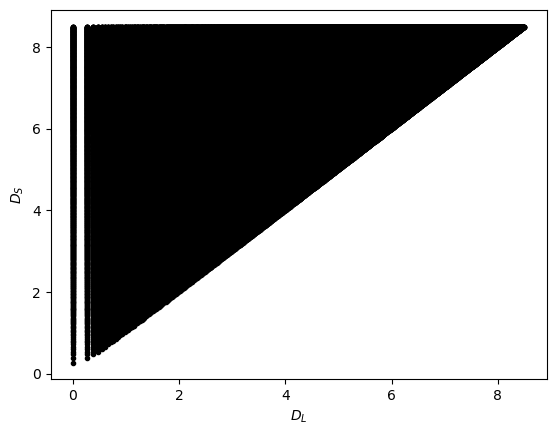

In [60]:
n=1000
Ds = np.sqrt(np.linspace(D1, Dn, n))
params = np.vstack(np.meshgrid(Ds, Ds)).reshape(2,-1).T
pirel_mas = pi_rel(params[:,0],params[:,1])
params = params[pirel_mas>0]
print(params)

plt.figure()
plt.plot(params[:,0],params[:,1],'k.')
plt.xlabel(r'$D_L$')
plt.ylabel(r'$D_S$')
plt.show()

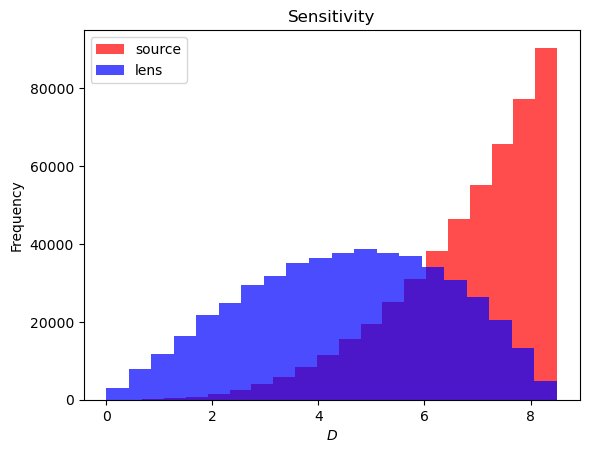

In [65]:
plt.hist(params[:,1], bins=20, color='red', alpha=0.7, label='source')
plt.hist(params[:,0], bins=20, color='blue', alpha=0.7, label='lens')
plt.legend()
plt.title(r'Geometric Sensitivity')
plt.xlabel(r'$D$')
plt.ylabel('Frequency')
plt.show()

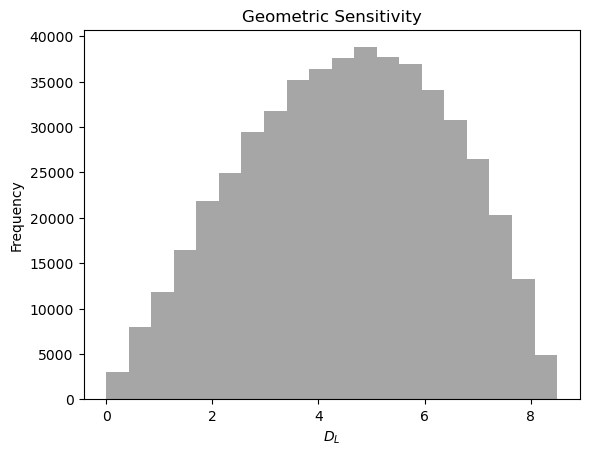

In [67]:
plt.hist(params[:,0], bins=20, color='grey', alpha=0.7)
plt.xlabel(r'$D_L$')
plt.ylabel('Frequency')
plt.savefig('geometric_lens_sensitivity.png')
plt.title(r'Geometric Sensitivity')
plt.show()

[[1.00000000e-03 6.02549850e-01 9.98340386e+02 9.01691971e+02
  3.29342992e+04 5.42315052e+02]
 [1.90115941e-01 6.02549850e-01 3.60033447e+00 5.41489833e+01
  1.97779161e+03 3.16389540e+01]
 [2.68862683e-01 6.02549850e-01 2.05975704e+00 4.09568814e+01
  1.49595009e+03 2.36937555e+01]
 [3.29287432e-01 6.02549850e-01 1.37724679e+00 3.34907418e+01
  1.22324934e+03 1.91984196e+01]
 [3.80227937e-01 6.02549850e-01 9.70387658e-01 2.81119851e+01
  1.02679026e+03 1.59610028e+01]]


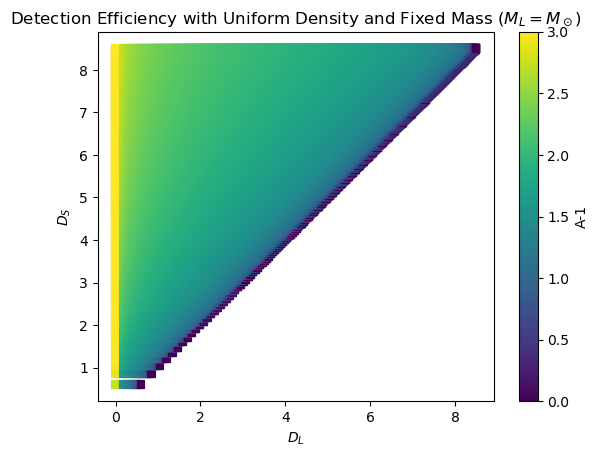

In [170]:
n = 200
M = 100.0
DLs = np.sqrt(np.linspace(D1, Dn, n*10))
DSs = np.sqrt(np.linspace(D1, Dn, n))
params = np.vstack(np.meshgrid(DLs, DSs)).reshape(2,-1).T
pirels = pi_rel(params[:,0],params[:,1])
params = params[pirels>0]
pirels = pirels[pirels>0]
thetaEs = thetaE(M,pirels)
tEs = tE(thetaEs,10.)
u0s = 1./(params[:,1]*thetaEs)
Amaxs = Amax(u0s,0.,tEs)-1.  # so that no magnification has 0 weight for detection

N_samples, dims = params.shape
components = np.zeros((N_samples,dims+4))
components[:,:dims] = params
components[:,dims] = pirels
components[:,dims+1] = thetaEs
components[:,dims+2] = tEs
components[:,dims+3] = u0s
components[:,-1] = Amaxs
print(components[:5,:])

plt.figure()
plt.scatter(components[:,0],components[:,1],c=np.log10(components[:,-1]),marker='s', linewidths=0.1)
plt.title(r'Detection Efficiency with Uniform Density and Fixed Mass ($M_L=M_\odot$)')
plt.xlabel(r'$D_L$')
plt.ylabel(r'$D_S$')
plt.colorbar(label='A-1')
plt.clim((0,3.0))
plt.show()

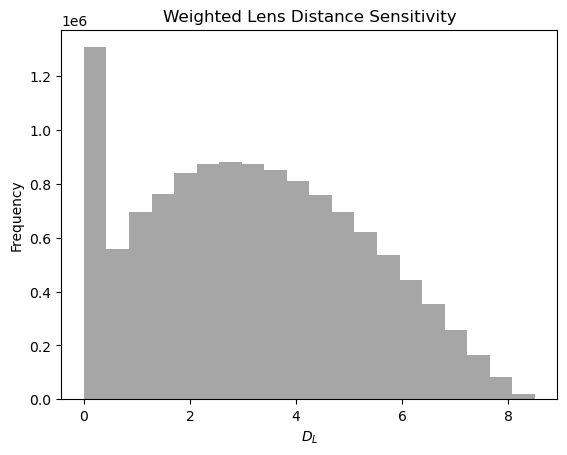

In [164]:
plt.hist(components[:,0], weights=components[:,-1], bins=20, color='grey', alpha=0.7)
plt.xlabel(r'$D_L$')
plt.ylabel('Frequency')
plt.savefig('lens_magnification_sensitivity_100solar.png')
plt.title(r'Weighted Lens Distance Sensitivity')
plt.show()

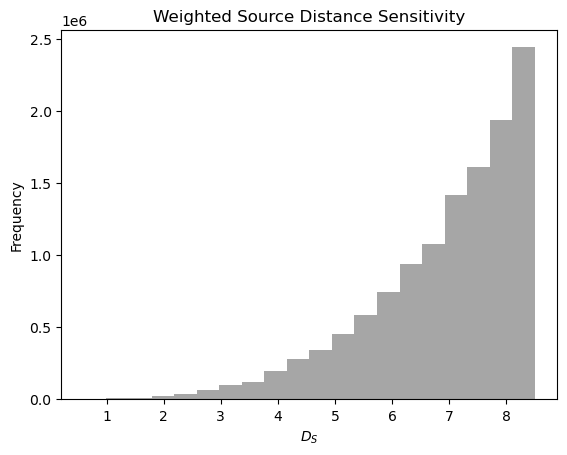

In [165]:
plt.hist(components[:,1], weights=components[:,-1], bins=20, color='grey', alpha=0.7)
plt.xlabel(r'$D_S$')
plt.ylabel('Frequency')
plt.savefig('source_distance_sensitivity.png')
plt.title(r'Weighted Source Distance Sensitivity')
plt.show()

[0.90906729 0.90672902 0.88854248 0.77942323 0.71447129 0.64951936
 0.58456742 0.51961548 0.12990387]


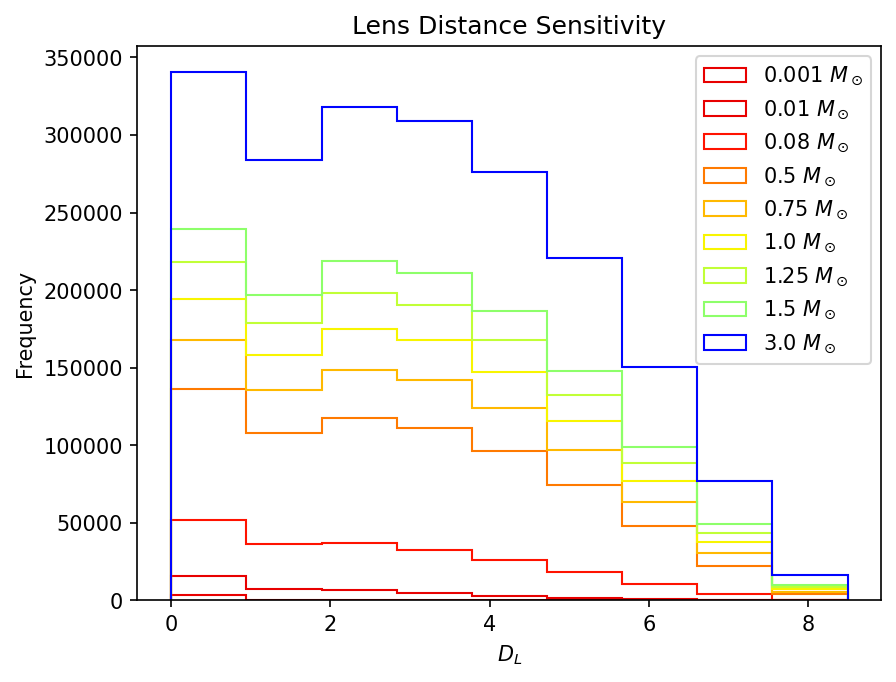

In [168]:
from matplotlib import cm

n = 200
M = np.array([0.001,0.01, 0.08, 0.5, 0.75, 1.0, 1.25, 1.5, 3.0, 100.0])
labels = ['0.001','0.01', '0.08', '0.5', '0.75', '1.0', '1.25', '1.5', '3.0', '100.0']
colour_ref = (np.log10(M)+3)/(np.log10(M[-1])+3)
colour_ref = M[:-1]/3.5
colour_ref = (1 - colour_ref)/((1 - colour_ref)[0]+0.1)
print(colour_ref)
sets = []

# stuff that's the same
DLs = np.sqrt(np.linspace(D1, Dn, n*10))
DSs = np.sqrt(np.linspace(D1, Dn, n))
params = np.vstack(np.meshgrid(DLs, DSs)).reshape(2,-1).T
pirels = pi_rel(params[:,0],params[:,1])
params = params[pirels>0]
pirels = pirels[pirels>0]

plt.figure(dpi=150)

# stuff that changes with m
for i, m in enumerate(M):
    thetaEs = thetaE(m,pirels)
    tEs = tE(thetaEs,10.)
    u0s = 1./(thetaEs*params[:,1])
    Amaxs = Amax(u0s,0.,tEs) - 1.

    N_samples, dims = params.shape
    components = np.zeros((N_samples,dims+4))
    components[:,:dims] = params
    components[:,dims] = pirels
    components[:,dims+1] = thetaEs
    components[:,dims+2] = tEs
    components[:,dims+3] = u0s
    components[:,-1] = Amaxs
    sets.append(components)
    if i != len(M)-1:
        plt.hist(components[:,0], weights=components[:,-1], bins=9, color=cm.jet(colour_ref[i]),  histtype='step', label=r'%s $M_\odot$' %labels[i])

plt.xlabel(r'$D_L$')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('lens_magnification_sensitivity_by_mass.png')
#plt.yscale('log')
#plt.hist(components[:,0], weights=components[:,-1], bins=9, color=cm.jet(colour_ref[i]),  histtype='step', label=r'%s $M_\odot$' %labels[i])
#plt.legend()
#plt.savefig('lens_magnification_log_sensitivity_by_mass.png')
plt.title(r'Lens Distance Sensitivity')
plt.show()


## Detection Efficiency Based on Period of Detectability

Michael has suggested that a commonly used magnification threshold for detectability is $A=1.3$. I'm going to write a function that determines the probability of detection based on how long the event is above the detectability threshold. This will require some extra prior distributions for velocity and I need to think about how to keep those uniform but representative of the geometry of an observation. 

### Getting t from A
$$t = t_E \sqrt{u(t)^2 - u_{0}^{2}}+t_0,$$
$$t' = t_E \sqrt{u(t)^2 - u_{0}^{2}}.$$

$$A(u)={\frac {u^{2}+2}{u{\sqrt {u^{2}+4}}}}.$$
$$u = 2\sqrt{-1\pm\sqrt{1+(A^2-1)^{-1}}}$$

In [104]:
def detectability(u0, tE, t0=0):
    ''' probabilities based on how long the event is detectable for'''

    # calculate t from A
    t_det = detectable_duration(u0, tE, t0=0)

    cadence = (365.25/2., 1./2., 1./50.) # off-season, day-time, shortest event

    if len(t_det) == 1:
        # Case 1
        if t_det > cadence[0]:  # 185.125 days
            P = 1.  # event will definitely be observed
        # Case 2
        elif t_det > cadence[1]:  # 0.5 days = 12 hr
            P = (cadence[0] + t_det - cadence[1]) / 365.25  # probability the event will happen 
                                                            # during the observing season
        # Case 3
        elif t_det > cadence[2]:  # 0.02 days ~ 30 min
            P1 = (cadence[0] + t_det - cadence[1]) / 365.25
            P2 = (cadence[1] + t_det + cadence[2])
            P = P1 * P2
        # Case 4
        else:
            P = 0.  # event isn't long enough to be detectable

    else:
        P = np.zeros_like(t_det)
        case1 = np.where(t_det>cadence[0])
        case2 = np.where((t_det<cadence[0]) & (t_det>cadence[1]))
        case3 = np.where((t_det<cadence[1]) & (t_det>cadence[2]))
        case4 = np.where(t_det<cadence[2])
        
        P[case1] = 1.0
        P[case2] = (cadence[0] + t_det[case2] - cadence[1]) / 365.25
        P[case3] = (cadence[0] + t_det[case3] - cadence[1]) / 365.25 * (cadence[1] + t_det[case3] + cadence[2])
        P[case4] = 0.0

    return P

def detectable_duration(u0, tE, t0=0):
    ''' $t_{det}$, given a detectability threshold of $A=1.3$.'''

    # Will the event be magnified enough for detection
    A_threshold = 1.3
    t_det = 2.*t_from_A(A_threshold,u0,tE)

    return t_det

def t_from_A(Ai,u0,tE):
    ''' find the positive time (since $t_0$) where the $A = A_i$
    
    NOTES
    ------
    $t' = t_E \sqrt{u(t)^2 - u_{0}^{2}}$
    '''

    u = u_from_A(Ai)

    if type(u0) == type(1.0):
        if u**2 < u0**2:
            uterm = 0.
        else:
            uterm = np.sqrt(u**2 - u0**2)
    else:
        uterm = np.zeros_like(u0)
        possible = np.where( u**2 >= u0**2 )
        uterm[possible] = np.sqrt(u**2 - u0**2)
        
    t = tE * uterm

    return t

def quadratic_formula(a, b, c, pm=False):
    ''' finding x, from a 2 degree polynomial, using the quadratic formula.
    
    INPUT
    ------
    a - float or numpy array
    b - float or numpy array
    c - float or numpy array

    OPTIONAL INPUTS
    ----------------
    pm - boolean
         return both positive and negative sqrt solution

    OUTPUTS
    --------
    x - float or numpy array, like a, b, and c
    or 
    x1, x2 - (if pm is True) floats or numpy arrays, like a, b, and c

    NOTES
    ------
    $ax^2 + bx + c = 0$
    $x = \frac{ -b \pm sqrt{b^2 - 4ac} {2a}$
    '''
    
    x1 = (-b + np.sqrt(b**2-4.0*a*c)) / 2*a
    x2 = (-b - np.sqrt(b**2-4.0*a*c)) / 2*a

    if pm:
        return x1, x2
    else:
        return x1

def u_from_A(Ai):
    ''' find u where the $A = A_i$
    
    NOTES
    ------
    $x = u^2$
    $x^2 + 4x -4/(A^2-1) = 0$
    $a = 1$, $b = 4$, $c = \frac{-4}{A^2-1}$
    '''

    a = (1.0)
    b = (4.0)
    c = -4.0/(Ai**2-1.0)
    
    x1 = quadratic_formula(a, b, c)
    #u1 = np.sqrt(1./Ai**2 - 4. + np.sqrt(16. + 1./(Ai**4.)))
    u1 = np.sqrt(x1)

    return u1
    

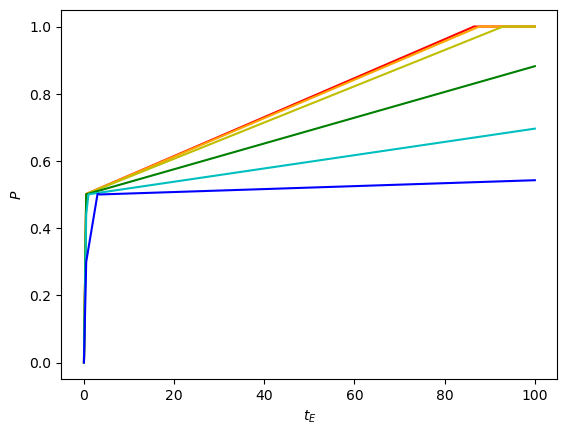

In [118]:
import matplotlib.pyplot as plt

tE = np.linspace(0.001, 100, 200)  # days
u0 = 0.2  # theta_E
A_threshold = 1.3  # X
#print(detectability(u0, tE, pi_rel))

plt.figure()
plt.plot(tE, detectability(u0/2., tE), 'r-')
plt.plot(tE, detectability(u0, tE, pi_rel), color='orange')
plt.plot(tE, detectability(u0*2., tE), 'y-')
plt.plot(tE, detectability(u0*4., tE), 'g-')
plt.plot(tE, detectability(u0*5., tE), 'c-')
plt.plot(tE, detectability(u0*5.3, tE), 'b-')
plt.xlabel(r'$t_E$')
plt.ylabel(r'$P$')
plt.show()

In [43]:
# Testing A to u
import numpy as np

def quadratic_formula(a, b, c, pm=False):
    ''' '''
    x1 = (-b + np.sqrt(b**2-4.0*a*c)) / 2*a
    x2 = (-b - np.sqrt(b**2-4.0*a*c)) / 2*a

    if pm:
        return x1, x2
    else:
        return x1

def u_from_A(Ai):
    ''' find u where the $A = A_i$
    
    NOTES
    ------
    $t' = t_E \sqrt{u(t)^2 - u_{0}^{2}}$
    '''

    a = (1.0)
    b = (4.0)
    c = -4.0/(Ai**2-1.0)
    
    x1 = quadratic_formula(a, b, c)
    #u1 = np.sqrt(1./Ai**2 - 4. + np.sqrt(16. + 1./(Ai**4.)))
    u1 = np.sqrt(x1)

    return u1

def t_from_A(Ai,u0,tE,pi_rel):
    ''' find the positive time (since $t_0$) where the $A = A_i$
    
    NOTES
    ------
    $t' = t_E \sqrt{u(t)^2 - u_{0}^{2}}$
    '''

    u = u_from_A(Ai)
    t = tE * np.sqrt(u**2 - u0**2)

    return t

tE = 5.  # days
pi_rel = (1/4 - 1/8)  # mas
u0 = 0.2  # theta_E
A_threshold = 1.9  # X
print(A_threshold)

# calculate u
us = u_from_A(A_threshold)
print(us)

# calculate t
t = t_from_A(A_threshold,u0,tE,pi_rel)
print(t)

# re-calculate A
As = A(us)
print(As)
us = u(t,u0,0.,tE)
print(us)
A = A(us)
print(As)


1.9
0.5934146528715456
2.793478791053625
1.8999999999999997
0.5934146528715456
1.8999999999999997


### Onwards to the Histogram

The new detectability fuction is:
``` python
detectability(u0, tE, t0=0)
```

The old script was:
``` python
n = 200
M = 100.0
DLs = np.sqrt(np.linspace(D1, Dn, n*10))
DSs = np.sqrt(np.linspace(D1, Dn, n))
params = np.vstack(np.meshgrid(DLs, DSs)).reshape(2,-1).T
pirels = pi_rel(params[:,0],params[:,1])
params = params[pirels>0]
pirels = pirels[pirels>0]
thetaEs = thetaE(M,pirels)
tEs = tE(thetaEs,10.)
u0s = 1./(params[:,1]*thetaEs)
Amaxs = Amax(u0s,0.,tEs)-1.  # so that no magnification has 0 weight for detection

N_samples, dims = params.shape
components = np.zeros((N_samples,dims+4))
components[:,:dims] = params
components[:,dims] = pirels
components[:,dims+1] = thetaEs
components[:,dims+2] = tEs
components[:,dims+3] = u0s
components[:,-1] = Amaxs
```

$$\mu = \frac{v_{tan}}{\kappa d},$$
where $\kappa=4.74$, with $v$ in km/s, $d$ (the distance to the object) is in parsecs, and $\mu$ is in as/yr.
 

In [13]:
import numpy as np

# set-up values
n = 40  # nummber of lens instances
M = 1.0  # solar masses
D1, Dn  = 0.001**2, 8.5**2
print(D1, Dn)

# uniform distributions
DLs = np.sqrt(np.linspace(D1, Dn, n))
DSs = np.sqrt(np.linspace(D1, Dn, n))
v = np.linspace(0, 300, n)
angle = np.linspace(0, 2*np.pi, n)

# remove derpy distances
Dparams = np.vstack(np.meshgrid(DLs, DSs)).reshape(2,-1).T
not_derpy = np.where(Dparams[:,0] < Dparams[:,1])
Dparams = Dparams[not_derpy]


1e-06 72.25


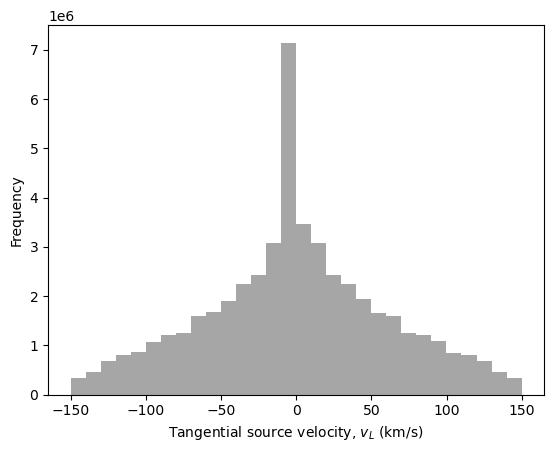

In [72]:
def v_to_pm(d,v):
    ''' get proper motion from velocity, given a distance to the object
    
    INPUTS
    -------
    d - float or numpy array 
        units: killoparsec (kpc)
    v - float or numpy array
        units: kilometers per second (km/s)

    OUTPUTS
    --------
    pm - float or numpy array (like v or d)
         units: milliarcseconds per yr (mas/yr)

    NOTES
    ------
    $$\mu = \frac{v_{tan}}{\kappa d},$$
    where $\kappa=4.74$.
    '''

    kappa = 4.74
    pm = v/(kappa*d)

    return pm

# uniform distributions
v = np.linspace(0, 150, n)
angle = np.linspace(0, 2*np.pi, n)

# mesh grid
Lparams = np.vstack(np.meshgrid(Dparams[:,0], v, angle, angle)).reshape(4,-1).T
Sparams = np.vstack(np.meshgrid(Dparams[:,1], v, angle, angle)).reshape(4,-1).T

# tangential velocity
vL = Lparams[:,1] * np.sin(Lparams[:,3])
vS = Sparams[:,1] * np.sin(Sparams[:,3])

# check with a histogram
plt.hist(vS, bins=30, color='grey', alpha=0.7)
plt.xlabel(r'Tangential source velocity, $v_{L}$ (km/s)')
plt.ylabel(r'Frequency')
plt.savefig('tangential_source_velocity_distribution.png')
plt.show()
# I'm fairly sure this is an arcsintype thing

# velocities projected into N and E
vLN = vL * np.cos(Lparams[:,2])
vLE = vL * np.sin(Lparams[:,2])
vSN = vS * np.cos(Sparams[:,2])
vSE = vS * np.sin(Sparams[:,2])

# convert tangential velocities to 
pmLN = v_to_pm(Lparams[:,0], vLN)
pmLE = v_to_pm(Lparams[:,0], vLE)
pmSN = v_to_pm(Sparams[:,0], vSN)
pmSE = v_to_pm(Sparams[:,0], vSE)

# 


'''
# relative proper motion
pm_relN = pmLN - pmSN
pm_relE = pmLE - pmSE
pm_rel = np.sqrt(pm_relN**2 + pm_relE**2)'''



# pm to tE



#pirels = pi_rel(params[:,0], params[:,1])
#params = params[pirels>0]
#pirels = pirels[pirels>0]
#thetaEs = thetaE(M, pirels)
#tEs = tE(thetaEs,10.)
#u0s = 1./(params[:,1]*thetaEs)

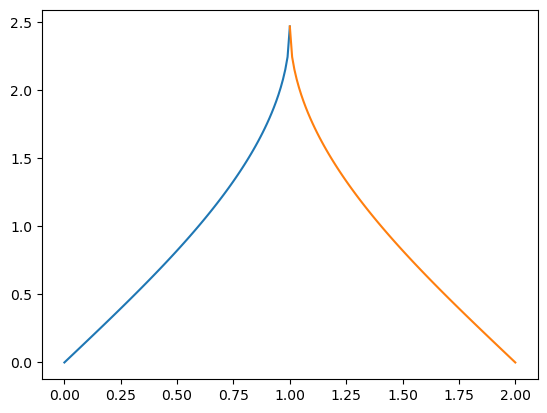

In [71]:
a = np.linspace(0, 1., 100)
b = np.arcsin(a)*np.arccos(a)
c = np.arcsin(a)*np.arcsin(a)
plt.figure()
#plt.plot(a,b)
#plt.plot(a,c)
plt.plot(a, b+c)
plt.plot(a+1.,(b+c)[::-1])
plt.show()

In [10]:
import numpy as np

print(np.cos(np.pi))  # South
print(np.cos(0.))  # North
print(np.sin(np.pi))  # South (E=0)
print(np.sin(0.))  # North (E=0)
print(np.sin(np.pi/2.))  # East
print(np.sin(3*np.pi/2.))  # West



-1.0
1.0
1.2246467991473532e-16
0.0
1.0
-1.0
